# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [  ] YES - make available
* [X] NO - keep private

# Overview

In this project, we mainly focuse on analyzing the several different factors which potentially contribute to the market house prices. We acquire the property sale price dataset from the kaggle webstie for testing our hypothesis on research question. In the following, we will investigate the variables in this dataset through the process of data cleaning, data analysis and feature engineering in order to determine the dominant factor in predicting house prices.

# Names

- Jiawei Zheng
- Zhi Chong Chris Lin
- Weijie Cheng
- Yunlin Tang
- Yuhang Chen

# Group Members IDs

- A14895383
- A14970682
- A14901005
- A14664383
- A15551753

# Research Question

*Of the many factors to consider when buying a home, is the `overall quality`, the `functionality`, or the `style` most dominant in determining house prices in the market?*

> **`Overall Quality`** is defined by the overall material and finish of the house rating.   

> **`Functionality`** is defined by the following attributes:                                      
(1) Type of utilities available,                                                              
(2) Type of heating,                                                                            
(3) Heating quality and condition,                                                            
(4) Central air conditioning,                   
(5) Electrical system,        
(6) Full bathrooms above grade,  
(7) Total rooms above grade (does not include bathrooms),                                         
(8) Size of garage in car capacity,         
(9) Physical locations within Ames city limits


> **`Style`** is defined by the following attributes:                                      
(1) Lot size in square feet,                                                                            
(2) General shape of property,                                                                                           
(3) Type of dwelling,                                                                              
(4) Style of dwelling,                   
(5) Exterior covering on house,        
(6) Basement walkout or garden level walls,  
(7) Number of fireplaces,                                                                               
(8) Garage location,         
(9) Wood deck area in square feet,  
(10) Open porch area in square feet

## Background and Prior Work

Housing is one of the most important lifetime investments one can make. While it can be a long-term equity with a fair market value, it can also have some short-term benefits in terms of paying yourself instead of a landlord. We believe that San Diego is a fine place because it is known for its warm weather climate, ideal location to the ocean, devloping education and job opportunities, and the ease of transportation. However, we are not sure whether these aspects are truly important to the mainstream housebuyers. Therefore, we will dig into our project from the view of looking at *which **factors** contribute the most to house prices*.

Previous [research](https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices) used a similar dataset and used different regression models to describe the correlations between each variable. We are looking to create some test result similar as theirs, where we can compare different cross-variable analyses and determine which of them is dominating the change in price.

According to [8 critical factors that influence a home’s value](https://www.opendoor.com/w/blog/factors-that-influence-home-value) and [6 factors that influece a home's value](https://www.inman.com/2017/08/07/6-factors-that-influence-a-homes-value/we), we observe that `neighborhood`, `location`, `size`, `age`, and `upgrades` are the relevant factors that determine the value of each house, each of which playing an important role at different degrees. There are also some social and economical factors such as the `local real estate market`, `economic indicators`, and `interest rates`, which are more or less controlled by the government and state-level legislations. Thus, in order to complete a comprehensive analysis on our topic, we will look for datasets that contain descriptive data on the qualities of the **`quality`** of the asset itself, existing **`utilities and facilities`**, **`archetecture style`**, `proximity to highways, utility lines, and public transit`, and `the occupancy square footages`.

However, taking all the features into consideration is too ambituous and vague for an individual project. As a result, we decided to group many existing properties on the asset itself into general features -- namely ***`style`***, ***`quality`***, and ***`functionality`***. We will then compare these in order to determine which feature drives the market house price from the asset perspective.

From a different perspective, our personal experience, we believe that all the above specified features are influential to the price of a house. However, we believe that **`quality`** is the most significant driving factor that determines how price increases compared to the other features. Houses with a good quality foundations and quality are very appealing to buyers, and are more willing to spend money when other features remain similar.

References (include links):
- 1) https://www.opendoor.com/w/blog/factors-that-influence-home-value
- 2) https://www.maxrealestateexposure.com/things-lower-homes-value/
- 3) https://www.inman.com/2017/08/07/6-factors-that-influence-a-homes-value/
- 4) https://www.mashvisor.com/blog/factors-that-affect-property-value/
- 5) https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr345.pdf

# Hypothesis


As our background finding supports, other than the actual price, the `overall quality`, the `functionality`, and the `style` are three of the major proximities in determining how likely one would purchase a house. 

Overall quality is rated by the dataset. However, limited by information our dataset provides, not all attributes that fully describe the functionality and style are included. Therefore, we will be defining `functionality` and `style` of houses based on the `data_description.txt` for homes in Ames, Iowa. A detailed list of defining features can be found in Research Question section.

Given the individual correlations of each attribute with sales price, we predict that the **overall quality**, measured by a rating of the overall material and finish of the house, **is the most dominant factor in predicting house prices**. This is because many housebuyers value the importance of durability and market value when they resale after years, as suppose the existing functions and styles because these features may become outdated.

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name: `train.csv`
- Link to the dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
- Number of observations: `1460`
- Description: This dataset includes **81 columns** with **79 explanatory variables** describing (almost) every aspect of residential homes, **1 reslt variable** (the sale price) and **1 id column** to identify each observation. These 79 variables all contribute to determining housing sales price at some degree.

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [81]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer



%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

Showing the basics of the dataset in following:

In [82]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', 81)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
df_baseline = df[['OverallQual','SalePrice']]

In [84]:
# Finding stats on categorical data
df[['MiscFeature', 'SalePrice']].groupby('MiscFeature').describe().SalePrice

,count,mean,std,min,25%,50%,75%,max
MiscFeature,,,,,,,,
Gar2,2.0,170750.000000,27223.611076,151500.0,161125.0,170750.0,180375.0,190000.0
Othr,2.0,94000.000000,55154.328933,55000.0,74500.0,94000.0,113500.0,133000.0
Shed,49.0,151187.612245,51642.728056,55993.0,120000.0,144000.0,172000.0,277000.0
TenC,1.0,250000.000000,NaN,250000.0,250000.0,250000.0,250000.0,250000.0


# Data Cleaning

### show the basic statistics of the dataset

In [85]:
# show the size of this table
print("table size:", df.shape)

print()

# show the features included in this dataset
print(df.columns)

table size: (1460, 81)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       '

### filter out the irrelevant features and save those we need for further use

Since we need to respectively compare the correlation of quality, style and functionality of house on the housing sale price, we need to first choose two subsets of variables which are categorized in either style or functionality.

1) In this step, we will extract a subset of features which are categorized in "style" factor from the original dataset

In [86]:
style = ['LotArea', 'LotShape', 'BldgType', 'HouseStyle',
        'Exterior1st', 'Exterior2nd', 'BsmtExposure', 'Fireplaces',
        'GarageType', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

In [87]:
df_st = df[['Id']+style+['SalePrice']].copy()
df_st.head(5)

,Id,LotArea,LotShape,BldgType,HouseStyle,Exterior1st,Exterior2nd,BsmtExposure,Fireplaces,GarageType,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,1,8450,Reg,1Fam,2Story,VinylSd,VinylSd,No,0,Attchd,0,61,0,208500
1,2,9600,Reg,1Fam,1Story,MetalSd,MetalSd,Gd,1,Attchd,298,0,0,181500
2,3,11250,IR1,1Fam,2Story,VinylSd,VinylSd,Mn,1,Attchd,0,42,0,223500
3,4,9550,IR1,1Fam,2Story,Wd Sdng,Wd Shng,No,1,Detchd,0,35,272,140000
4,5,14260,IR1,1Fam,2Story,VinylSd,VinylSd,Av,1,Attchd,192,84,0,250000


2) In the second step, we extract the features that are relevant to facility in the property and can be categorized into the "functionality" factor

In [88]:
funct = ['Utilities', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        'FullBath', 'TotRmsAbvGrd', 'Functional', 'GarageCars', 'Neighborhood']

In [89]:
df_fu = df[['Id']+funct+['SalePrice']].copy()
df_fu.head(5)

,Id,Utilities,Heating,HeatingQC,CentralAir,Electrical,FullBath,TotRmsAbvGrd,Functional,GarageCars,Neighborhood,SalePrice
0,1,AllPub,GasA,Ex,Y,SBrkr,2,8,Typ,2,CollgCr,208500
1,2,AllPub,GasA,Ex,Y,SBrkr,2,6,Typ,2,Veenker,181500
2,3,AllPub,GasA,Ex,Y,SBrkr,2,6,Typ,2,CollgCr,223500
3,4,AllPub,GasA,Gd,Y,SBrkr,1,7,Typ,3,Crawfor,140000
4,5,AllPub,GasA,Ex,Y,SBrkr,2,9,Typ,3,NoRidge,250000


### check null values

#### 1) find and deal with the null values in the style dataset

In [90]:
df_st.isna().sum()

Id                0
LotArea           0
LotShape          0
BldgType          0
HouseStyle        0
Exterior1st       0
Exterior2nd       0
BsmtExposure     38
Fireplaces        0
GarageType       81
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
SalePrice         0
dtype: int64

First we need to deal with the ***BsmtExposure*** column which contains 38 null values. According to the `data_description.txt`, this column may have following values:
- `Gd`	Good Exposure
- `Av`	Average Exposure (split levels or foyers typically score average or above)	
- `Mn`	Mimimum Exposure
- `No`	No Exposure
- `NA`	No Basement

Then we inspect whether the null value are related to th 'NA':

In [91]:
print('null values count:', df_st['BsmtExposure'].isna().sum())
df_st['BsmtExposure'].unique()

null values count: 38


array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

The above result shows that every value written in the `data_description.txt` exists in this column except the 'NA' value but we have a handfull of `nan` values. One possible approach for dealing with `nan` values is interpreting them as 'NA' which means `No Basement`.

In [92]:
df_st['BsmtExposure'].fillna('NA', inplace=True)

Then we need to inspect the null values in the ***GarageType*** column as above steps, the `data_description.txt` indicates this column should contain 7 values:
- `2Types`	More than one type of garage
- `Attchd`	Attached to home
- `Basment`	Basement Garage
- `BuiltIn`	Built-In (Garage part of house - typically has room above garage)
- `CarPort`	Car Port
- `Detchd`	Detached from home
- `NA`	No Garage

In [93]:
print('null values count:', df_st['GarageType'].isna().sum())
df_st['GarageType'].unique()

null values count: 81


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

Same as the ***BsmtExposure*** column, the `unique()` function indicates that the ***GarageType*** column contains every value written in the `data_description.txt` except `NA`. However, there are still null values in this column so we can interpret these as `No Garage`. Thus, we decide to impute these null values as `NA`. 

In [94]:
df_st['GarageType'].fillna('NA', inplace=True)

#### 2) find and deal with the null values in functionality dataset

In [95]:
df_fu.isna().sum()

Id              0
Utilities       0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      1
FullBath        0
TotRmsAbvGrd    0
Functional      0
GarageCars      0
Neighborhood    0
SalePrice       0
dtype: int64

We notice that there is only one column ***Electrical*** that has the Null, thus we need to first inspect the column values and think about how to deal with this:

In the `data_description.txt`, there are 5 uniqe values should be in the ***Electrical*** column:
- `SBrkr`	Standard Circuit Breakers & Romex
- `FuseA`	Fuse Box over 60 AMP and all Romex wiring (Average)	
- `FuseF`	60 AMP Fuse Box and mostly Romex wiring (Fair)
- `FuseP`	60 AMP Fuse Box and mostly knob & tube wiring (poor)
- `Mix`	Mixed

In [96]:
df_fu['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

The function `unique()` used above shows that every value in the data description exists in the column. Therefore, the existence of Null should be irrelevant to the column value. We conclude that this one NULL value may be missing completely at random (MCAR). Therefore dropping this obeservation from the table should solve.

In [97]:
df_fu = df_fu.dropna(axis=0)

In [98]:
df_fu.isna().sum()

Id              0
Utilities       0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
FullBath        0
TotRmsAbvGrd    0
Functional      0
GarageCars      0
Neighborhood    0
SalePrice       0
dtype: int64

Our data is now clean with no null values.

### Check Outliers

#### 1) check outliers in the style table

In this step, we will explore and plot the data to see if any numerical feature contain outliers in the style table. We include the column names of numerical data in `st_num_col` as shown below. For better visualization, we draw out histograms for distribution in each numeri calvariables seperately in order check the outliers.

In [99]:
st_num_col = ['LotArea', 'Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch']

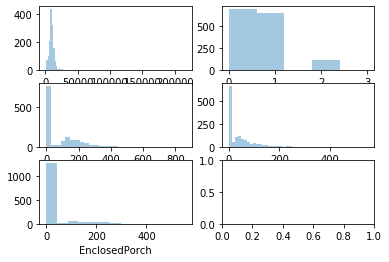

In [100]:
f, axes = plt.subplots(3, 2)
sns.distplot(df_st['LotArea'], kde=False, ax=axes[0,0], bins=100)
sns.distplot(df_st['Fireplaces'], kde=False, ax=axes[0,1], bins=5)
sns.distplot(df_st['WoodDeckSF'], kde=False, ax=axes[1,0])
sns.distplot(df_st['OpenPorchSF'], kde=False, ax=axes[1,1])
sns.distplot(df_st['EnclosedPorch'], kde=False, ax=axes[2,0], bins=13)

The histograms shown above indicate that there are many outliers in each numerical variable included in the style table, especially at value 0 which makes the distribution skewed to right. We will further investigate the outliers and transform these data in below section.

#### 2) check the outliers in the functionality table

Similarly, we will explore and plot the data to see if any numerical feature contain outliers in the functionality table. We include the column names of numerical data in `fu_num_col` as shown below. For better visualization, we draw out histograms for distribution in each numerical variables seperately in order check the outliers.

In [101]:
fu_num_col = ["FullBath", "TotRmsAbvGrd", "GarageCars", "Neighborhood"]

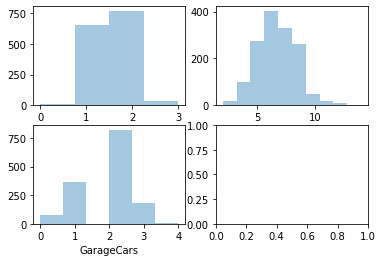

In [102]:
f, axes = plt.subplots(2, 2)
sns.distplot(df_fu['FullBath'], kde=False, ax=axes[0,0],bins=4)
sns.distplot(df_fu['TotRmsAbvGrd'], kde=False, ax=axes[0,1], bins=10)
sns.distplot(df_fu['GarageCars'], kde=False, ax=axes[1,0], bins=6)

The 3 histograms shown above do not indicate any dominant outliers in these three numerical variables. However, we will keep investigating the these data such as finding the correlation and relationship between them and sale price for data analysis.

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [103]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
import matplotlib.pyplot as plt

Now our data is clean and we can start analyzing by looking at the distribution of each value before determining our model. We are not expecting all attributes to be normally distributed as some ordinal properties like `TotRmsAbvGrd` from function and `Fireplaces` from style might have multimodal distributions, while others like `LotArea` may have significant outliers. Thus, we will look at the distributions first and decide how to deal with outliers.

In [104]:
df_st.head()

,Id,LotArea,LotShape,BldgType,HouseStyle,Exterior1st,Exterior2nd,BsmtExposure,Fireplaces,GarageType,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,1,8450,Reg,1Fam,2Story,VinylSd,VinylSd,No,0,Attchd,0,61,0,208500
1,2,9600,Reg,1Fam,1Story,MetalSd,MetalSd,Gd,1,Attchd,298,0,0,181500
2,3,11250,IR1,1Fam,2Story,VinylSd,VinylSd,Mn,1,Attchd,0,42,0,223500
3,4,9550,IR1,1Fam,2Story,Wd Sdng,Wd Shng,No,1,Detchd,0,35,272,140000
4,5,14260,IR1,1Fam,2Story,VinylSd,VinylSd,Av,1,Attchd,192,84,0,250000


In [105]:
df_st.describe()

,Id,LotArea,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,0.613014,94.244521,46.660274,21.954110,180921.195890
std,421.610009,9981.264932,0.644666,125.338794,66.256028,61.119149,79442.502883
min,1.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,7553.500000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,9478.500000,1.000000,0.000000,25.000000,0.000000,163000.000000
75%,1095.250000,11601.500000,1.000000,168.000000,68.000000,0.000000,214000.000000
max,1460.000000,215245.000000,3.000000,857.000000,547.000000,552.000000,755000.000000


In [106]:
df_fu.head()

,Id,Utilities,Heating,HeatingQC,CentralAir,Electrical,FullBath,TotRmsAbvGrd,Functional,GarageCars,Neighborhood,SalePrice
0,1,AllPub,GasA,Ex,Y,SBrkr,2,8,Typ,2,CollgCr,208500
1,2,AllPub,GasA,Ex,Y,SBrkr,2,6,Typ,2,Veenker,181500
2,3,AllPub,GasA,Ex,Y,SBrkr,2,6,Typ,2,CollgCr,223500
3,4,AllPub,GasA,Gd,Y,SBrkr,1,7,Typ,3,Crawfor,140000
4,5,AllPub,GasA,Ex,Y,SBrkr,2,9,Typ,3,NoRidge,250000


In [107]:
df_fu.describe()

,Id,FullBath,TotRmsAbvGrd,GarageCars,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,1.564770,6.517478,1.766964,180930.394791
std,421.411181,0.550987,1.625902,0.747546,79468.964025
min,1.000000,0.000000,2.000000,0.000000,34900.000000
25%,365.500000,1.000000,5.000000,1.000000,129950.000000
50%,730.000000,2.000000,6.000000,2.000000,163000.000000
75%,1094.500000,2.000000,7.000000,2.000000,214000.000000
max,1460.000000,3.000000,14.000000,4.000000,755000.000000


We will check how many unique attributes each column contains so we can group like terms when visualizing.

In [108]:
for i in df_fu.columns:
    if not i in ['Id', 'SalePrice']:
        print('# of Unique entries in ' + str(i) +': '+ str(df[i].nunique()))
        print('Unique entries in ' + str(i) +': '+ str(df[i].unique()))
        print()

# of Unique entries in Utilities: 2
Unique entries in Utilities: ['AllPub' 'NoSeWa']

# of Unique entries in Heating: 6
Unique entries in Heating: ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']

# of Unique entries in HeatingQC: 5
Unique entries in HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']

# of Unique entries in CentralAir: 2
Unique entries in CentralAir: ['Y' 'N']

# of Unique entries in Electrical: 5
Unique entries in Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]

# of Unique entries in FullBath: 4
Unique entries in FullBath: [2 1 3 0]

# of Unique entries in TotRmsAbvGrd: 12
Unique entries in TotRmsAbvGrd: [ 8  6  7  9  5 11  4 10 12  3  2 14]

# of Unique entries in Functional: 7
Unique entries in Functional: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']

# of Unique entries in GarageCars: 5
Unique entries in GarageCars: [2 3 1 0 4]

# of Unique entries in Neighborhood: 25
Unique entries in Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 

We observe that some attributes have too many unique values, and decide to plot them individually so we can observe patterns (if any) more clearly. Thus, we will start with plotting the following columns `Utilities, Heating, HeatingQC, CentralAir, Electrical, FullBath, Functional, GarageCars`:

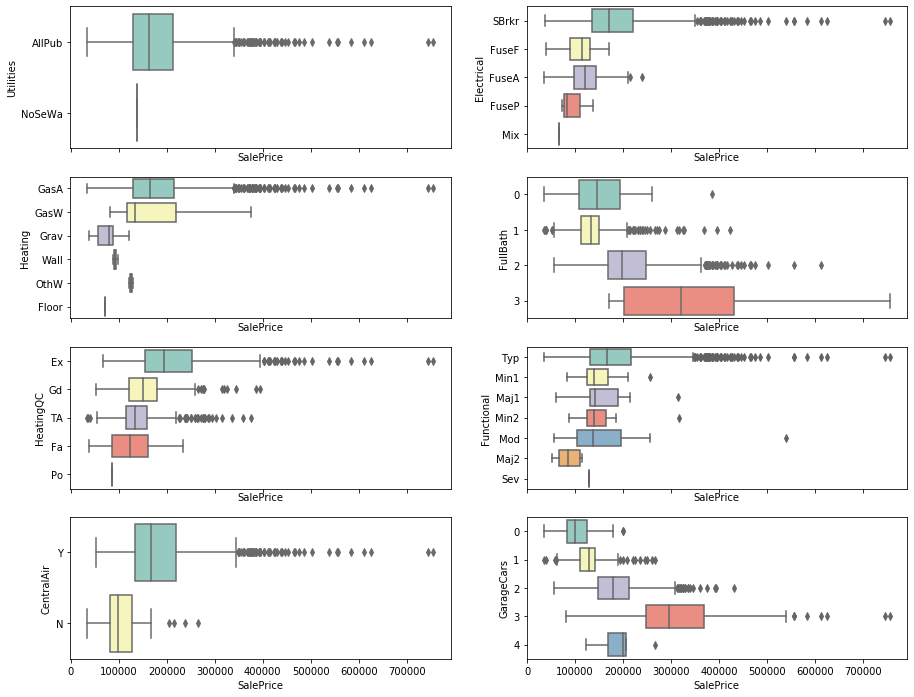

In [109]:
f, axes = plt.subplots(4, 2, figsize=(15, 12), sharex=True)
sns.boxplot(x = "SalePrice", y = "Utilities", data = df_fu, orient="h", palette="Set3", ax=axes[0, 0])
sns.boxplot(x = "SalePrice", y = "Heating", data = df_fu, orient="h", palette="Set3", ax=axes[1, 0])
sns.boxplot(x = "SalePrice", y = "HeatingQC", data = df_fu, orient="h", palette="Set3", ax=axes[2, 0])
sns.boxplot(x = "SalePrice", y = "CentralAir", data = df_fu, orient="h", palette="Set3", ax=axes[3, 0])
sns.boxplot(x = "SalePrice", y = "Electrical", data = df_fu, orient="h", palette="Set3", ax=axes[0, 1])
sns.boxplot(x = "SalePrice", y = "FullBath", data = df_fu, orient="h", palette="Set3", ax=axes[1, 1])
sns.boxplot(x = "SalePrice", y = "Functional", data = df_fu, orient="h", palette="Set3", ax=axes[2, 1])
sns.boxplot(x = "SalePrice", y = "GarageCars", data = df_fu, orient="h", palette="Set3", ax=axes[3, 1])

We can observe some general patterns from the plots above, but we still need to take in cosideration of the value counts before discussing the distributions. So we decided to take a closer look at the categorical variables first. We will compare these boxplots side by side with the respective countplots.

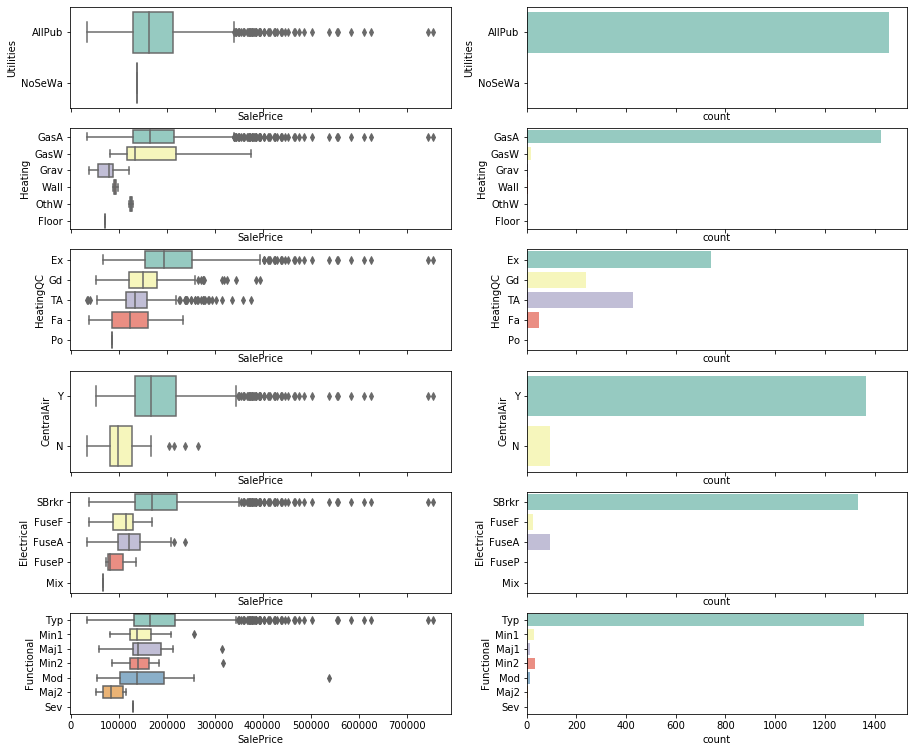

In [110]:
f, axes = plt.subplots(6, 2, figsize=(15, 13), sharex='col')
sns.boxplot(x = "SalePrice", y = "Utilities", data = df_fu, orient="h", palette="Set3", ax=axes[0, 0])
sns.countplot(y = df_fu['Utilities'], palette="Set3", ax=axes[0, 1])

sns.boxplot(x = "SalePrice", y = "Heating", data = df_fu, orient="h", palette="Set3", ax=axes[1, 0])
sns.countplot(y = df_fu['Heating'], palette="Set3", ax=axes[1, 1])

sns.boxplot(x = "SalePrice", y = "HeatingQC", data = df_fu, orient="h", palette="Set3", ax=axes[2, 0])
sns.countplot(y = df_fu['HeatingQC'], palette="Set3", ax=axes[2, 1])

sns.boxplot(x = "SalePrice", y = "CentralAir", data = df_fu, orient="h", palette="Set3", ax=axes[3, 0])
sns.countplot(y = df_fu['CentralAir'], palette="Set3", ax=axes[3, 1])

sns.boxplot(x = "SalePrice", y = "Electrical", data = df_fu, orient="h", palette="Set3", ax=axes[4, 0])
sns.countplot(y = df_fu['Electrical'], palette="Set3", ax=axes[4, 1])

sns.boxplot(x = "SalePrice", y = "Functional", data = df_fu, orient="h", palette="Set3", ax=axes[5, 0])
sns.countplot(y = df_fu['Functional'], palette="Set3", ax=axes[5, 1])

For most of the functions above, we observe that there is a dominant category within each property. For example, almost all of the `Utilities` are categorized as `AllPub`, meaning that `All public Utilities (E,G,W,& S)` are available. This explains for the large amount of outliers towards the right end of Saleprices. However, we can't drop all those entries as it might overly truncate our data and lose important information. Similarily, for `Heating`, `CentralAir`, `Electrical`, `Functional`, we also see a dominant category and most of the outliers are towards the right of those boxes.

There are still some patterns evident. Specifically, the better the heating quality is, (rankings include Ex, Gd, TA, Fa, Po), the relatively higher the median sale price is. Additionally, the central air also shows some evidence that houses with its existence are usually more expensive.

We will also look at some of the continuous variables. Beginning with finding the correlation between functional variables.

In [111]:
corr = df_fu.drop(columns = 'Id').corr()
corr = corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
corr

,FullBath,TotRmsAbvGrd,GarageCars,SalePrice
FullBath,1,0.55,0.47,0.56
TotRmsAbvGrd,0.55,1,0.36,0.53
GarageCars,0.47,0.36,1,0.64
SalePrice,0.56,0.53,0.64,1


The correlation map tells us that GarageCars has the greatest relationshi with SalePrice. We will use this variable when grouping attributes for our pairwise comparisons.

/Users/steven/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/steven/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


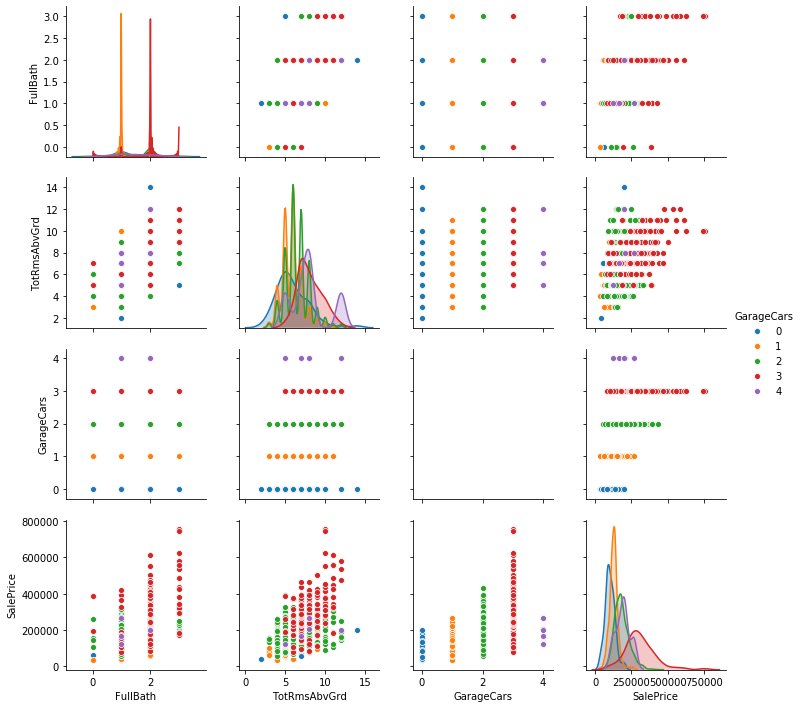

In [112]:
sns.pairplot(df_fu[['FullBath', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice']], hue = 'GarageCars')

We have grouped the variables `FullBath`, `TotRmsAbvGrd`, and `SalePrice` using `GarageCars` above.

In the first column, we can see a multi-modal distribution of `FullBath` and `GarageCars`. This is likely because in most cases, the more cars that can be parked, thelarger the garage is, and the larger the actual house is. Next, we look at how `FullBath` relates to `SalePrice`. We can observe an increase in sale price as the number of full baths increase. Especially, the houses with larger garage space, denoted by the red dots, are more clustered when there are 2 or 3 full baths. Also tha the dots above 400000 are mostly all red dots, suggesting that the greater the garage area is, the likelihood that the house is more expensive.

Similarily, we can also observe from the plot with `TotRmsAbvGrd` and `SalePrice` that houses with larger garages, houses are usually more expensive. Although there are two left dots that depict a house with 2 rooms and no garage space, and a house with 14 rooms with no garage space, we can consider tem as outliers because they are both unique cases. In the plot next to this, `GarageCars` and `SalePrice`, we can see that sale prices abov 400000 almost all have 3 cars in their garage space. This is again, a strong indicator to determine houe prices.

Finally, we can look at the distribution of `SalePrice`. Since there is not much data on houses with garage space to park 4 cars, it is relatively clustered around 200000. However, we can see that houses with garage space to park 0, 1, and 2 cars are generally clustered around 100000, 140000, 180000, with a slight difference in the median sale prices of each type of house. This is evident as the peak of these three distributions is slightly shifted to the right compared to the previous. However, houses with garage space to park 3 cars have a less clustered distribution. It extends towards both ends, with its right tail reaching 800000.

Like what we've done above, we will now draw plots to analyze the style table: the box plot shows the distribution of each unique value in one attribute where the `SalePrice` on the x-axis; and the count plot shows the count of unique value in different attributes.

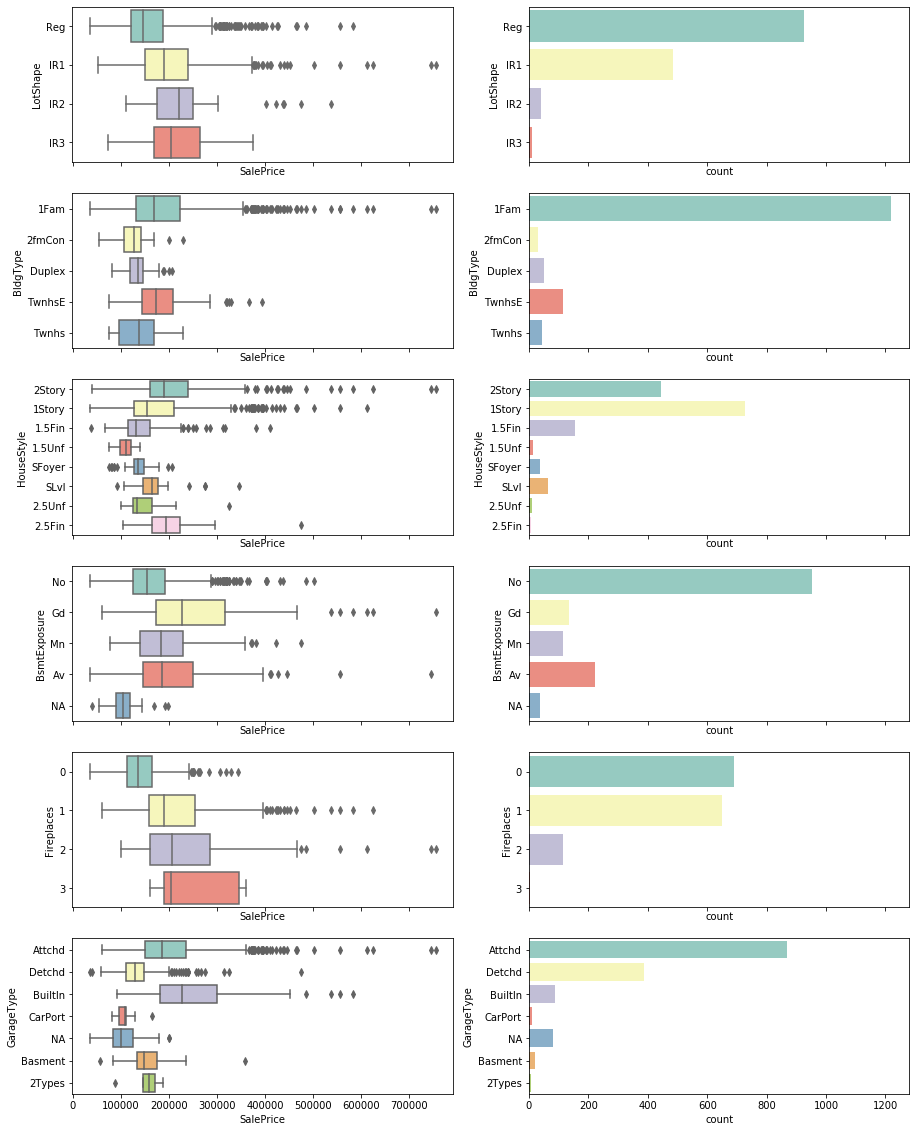

In [113]:
f, axes = plt.subplots(6, 2, figsize=(15, 20), sharex='col')
sns.boxplot(x = "SalePrice", y = "LotShape", data = df_st, orient="h", palette="Set3", ax=axes[0, 0])
sns.countplot(y = df_st['LotShape'], palette="Set3", ax=axes[0, 1])

sns.boxplot(x = "SalePrice", y = "BldgType", data = df_st, orient="h", palette="Set3", ax=axes[1, 0])
sns.countplot(y = df_st['BldgType'], palette="Set3", ax=axes[1, 1])

sns.boxplot(x = "SalePrice", y = "HouseStyle", data = df_st, orient="h", palette="Set3", ax=axes[2, 0])
sns.countplot(y = df_st['HouseStyle'], palette="Set3", ax=axes[2, 1])

sns.boxplot(x = "SalePrice", y = "BsmtExposure", data = df_st, orient="h", palette="Set3", ax=axes[3, 0])
sns.countplot(y = df_st['BsmtExposure'], palette="Set3", ax=axes[3, 1])

sns.boxplot(x = "SalePrice", y = "Fireplaces", data = df_st, orient="h", palette="Set3", ax=axes[4, 0])
sns.countplot(y = df_st['Fireplaces'], palette="Set3", ax=axes[4, 1])

sns.boxplot(x = "SalePrice", y = "GarageType", data = df_st, orient="h", palette="Set3", ax=axes[5, 0])
sns.countplot(y = df_st['GarageType'], palette="Set3", ax=axes[5, 1])

Unlike function, the style features are distributed more evenly across the attributes. From the `LotSpace`, we can observe that irregularly shaped houses are on average more expensive than regularly shapped ones. This could be that regularly shaped houses refer to apartments or houses in more clustered areas, while the irregularly shaped houses can be located anywhere occupying more land area. That also explains why houses could be shapped irregularly in three ways where there is only category of regularly shaped houses.

The `BldgType` and `HouseStyle` doesn't determine sales prices with an obvious category. However, `BsmtExposure` and `Fireplaces` are more indicative. A good basement exposure (yellow bar) generally indicates higher prices, which we concluded that it could be a feature of exclusive and expensive housing. Moreover, the more `Fireplaces` one has, the significantly higher the sale price is. Thus, also an important indicator we will consider in building our model.

We will also look at some of the continuous variables. Beginning with finding the correlation between style variables.

In [114]:
corr = df_st.drop(columns = 'Id').corr()
corr = corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
corr

,LotArea,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
LotArea,1,0.27,0.17,0.085,-0.018,0.26
Fireplaces,0.27,1,0.2,0.17,-0.025,0.47
WoodDeckSF,0.17,0.2,1,0.059,-0.13,0.32
OpenPorchSF,0.085,0.17,0.059,1,-0.093,0.32
EnclosedPorch,-0.018,-0.025,-0.13,-0.093,1,-0.13
SalePrice,0.26,0.47,0.32,0.32,-0.13,1


/Users/steven/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/steven/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


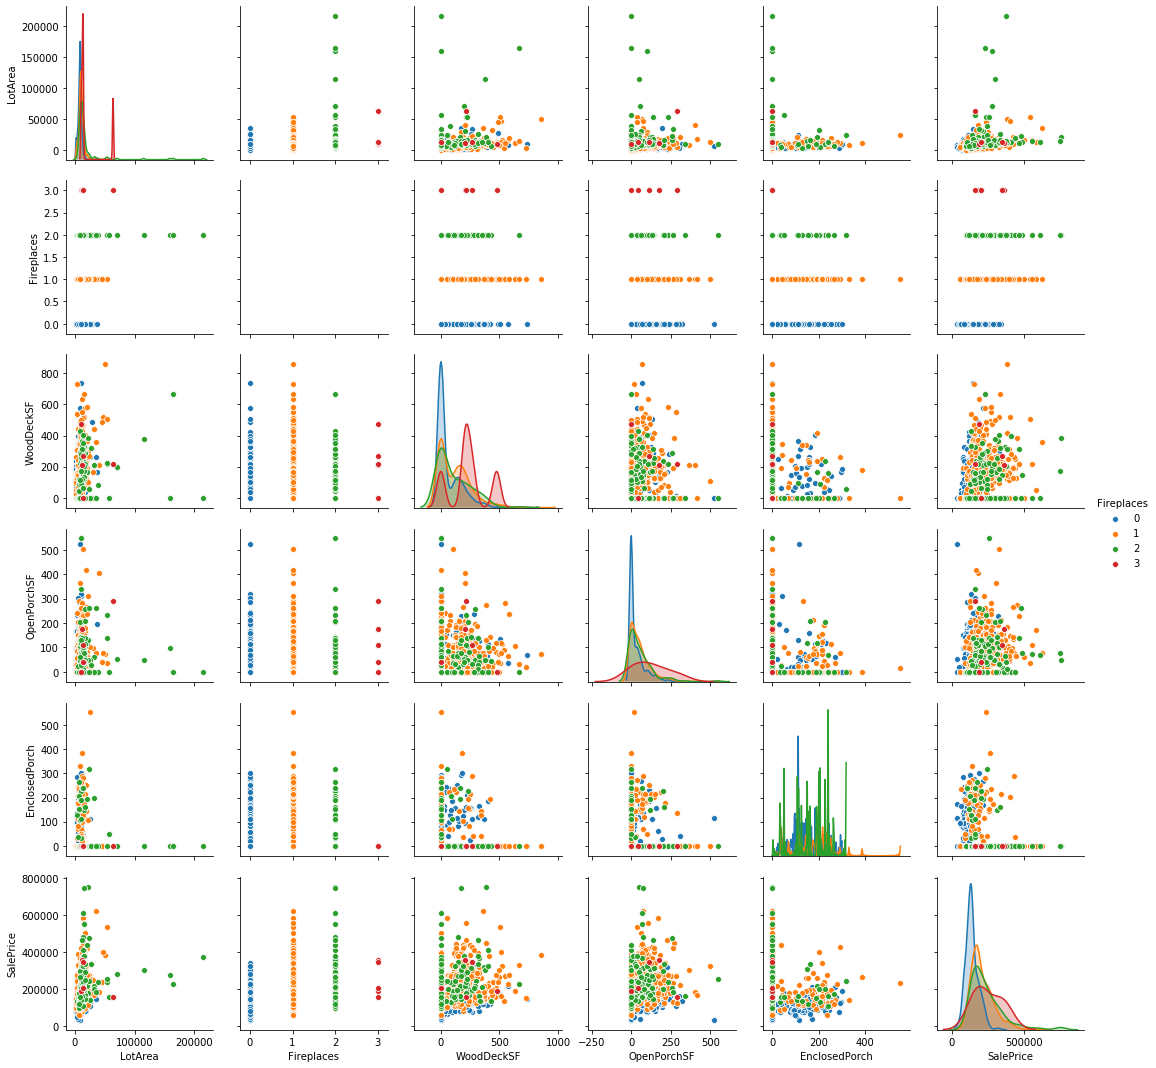

In [115]:
sns.pairplot(df_st[['LotArea', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice']], hue = 'Fireplaces')

Unlike where we could picture functionality, the pairplots for style features are more difficult to directly infer from. There is not much to comment on with pairwise correlation as relationships are not as strong, so we will take another approach to group features that are similar together.

Here we create a self-defined function to identify the `LotArea` attribute in each observation in order to group them into different level of area. In the following graph, we see there may be a relationship between the grouped `LotArea` and the sales price of the property:

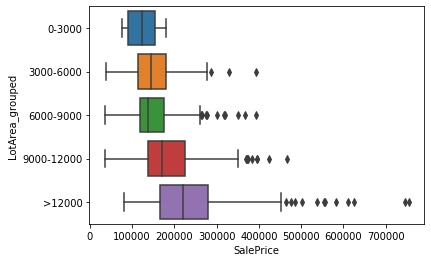

In [116]:
def lotgroup(x):
    if x < 3000:
        return '0-3000'
    elif x < 6000:
        return '3000-6000'
    elif x < 9000:
        return '6000-9000'
    elif x < 12000:
        return '9000-12000'
    else:
        return '>12000'
df_st['LotArea_grouped'] = df_st['LotArea'].apply(lotgroup).sort_values()
sns.boxplot(y="LotArea_grouped", x="SalePrice", data=df_st, orient = "h", order = ['0-3000','3000-6000','6000-9000','9000-12000','>12000'])

For the `WoodDeckSF` attribute, we also create a self-defined function to group and clean the data in this column. After cleaning, we drew a boxplot to show the distribution:

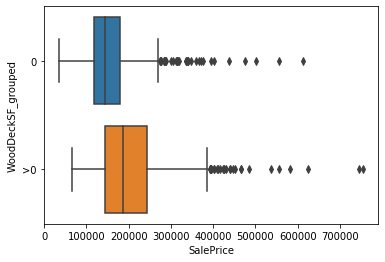

In [117]:
def woodgroup(x):
    if x == 0:
        return '0'
    else:
        return '>0'
df_st['WoodDeckSF_grouped'] = df_st['WoodDeckSF'].apply(woodgroup).sort_values()
sns.boxplot(y="WoodDeckSF_grouped", x="SalePrice", data=df_st, orient = "h")

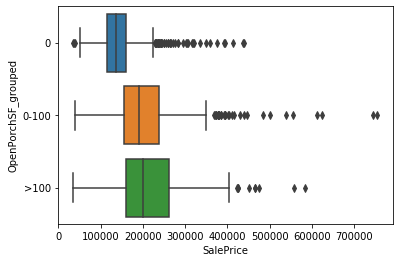

In [118]:
def opengroup(x):
    if x == 0:
        return '0'
    elif x < 100:
        return '0-100'
    else:
        return '>100'
df_st['OpenPorchSF_grouped'] = df_st['OpenPorchSF'].apply(opengroup).sort_values()
sns.boxplot(y="OpenPorchSF_grouped", x="SalePrice", data=df_st, orient = "h", order = ['0', '0-100', '>100'])

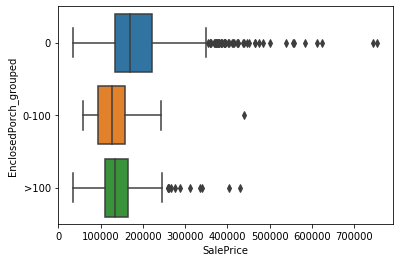

In [119]:
def closegroup(x):
    if x == 0:
        return '0'
    elif x < 100:
        return '0-100'
    else:
        return '>100'
df_st['EnclosedPorch_grouped'] = df_st['EnclosedPorch'].apply(closegroup).sort_values()
sns.boxplot(y="EnclosedPorch_grouped", x="SalePrice", data=df_st, orient="h", order = ['0', '0-100', '>100'])

# Prediction

### Prediction using functionality columns

First we need to transform different types of attributes into useful features for further prediction on sales price. Since there are categorical and numerical variables in the functionality table, we decide to transform them by using `OneHotEncode` and `StandardScaler` respectively. After transforming the data, we use `LinearRegression` for prediction.

In [120]:
cat_col = ["Utilities", "Heating", "HeatingQC", "CentralAir","Electrical","Functional"]
num_col = ["FullBath", "TotRmsAbvGrd", "GarageCars", "Neighborhood"]

In [121]:
# Create a column transformer that standardize all the numeric columns and one hot code all the categorical columns
oh_ct = ColumnTransformer(transformers = [
    ('stan', StandardScaler(), num_col),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'), cat_col)
],
               remainder = 'passthrough'
)

We chose linear regression because it has the best accuracy score among all of the models we tested by a large margin.

In [122]:
# Create the pipeline for functionality that fit the data to columntransformer and perform linear regression
pl_1 = Pipeline(steps = [
    ('one_hot', oh_ct),
    ('linear', LinearRegression())    
])

In [123]:
df = df_fu.copy()


We add convert the neighborhood column into distance to city center by manually calculating the distance of the city and each neighborhood. The tool we used is Zillow and Google map. Then we split the functionality table into the test and train sets for training the model:

In [124]:
# Convert all the neighborhood from categorical data to their distance to city center

all_neigh = sorted(list(df['Neighborhood'].unique()))
dist = [3.37, 2.7, 2.54, 0.64, 1.54, 3.1, 2.06, 2.23, 3.39, 1.33, 0.3, 5.09, 1.7, 2.82, 2.44, 4.2, 4.12, 0.8, 1.4, 3.7, 4.5, 2.55, 3.23, 3.55, 1.9]
dist_dict = dict(zip(all_neigh, dist))
center_dist = df['Neighborhood'].map(dist_dict)

y = df['SalePrice']

df = df.assign(Neighborhood = center_dist)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['SalePrice', 'Id']), y)
X_train.head()


,Utilities,Heating,HeatingQC,CentralAir,Electrical,FullBath,TotRmsAbvGrd,Functional,GarageCars,Neighborhood
515,AllPub,GasA,Ex,Y,SBrkr,2,9,Typ,3,4.12
1455,AllPub,GasA,Ex,Y,SBrkr,2,7,Typ,2,3.39
883,AllPub,GasA,TA,N,SBrkr,1,10,Typ,1,1.40
1422,AllPub,GasA,Ex,Y,SBrkr,1,3,Typ,2,3.10
520,AllPub,GasA,TA,N,FuseA,2,7,Typ,0,0.80


In [125]:
pd.DataFrame(oh_ct.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.786404,1.475179,1.639897,1.288906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.786404,0.275739,0.302054,0.679674,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.021004,2.074899,-1.035789,-0.981109,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.021004,-2.123139,0.302054,0.437650,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.786404,0.275739,-2.373632,-1.481847,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0.786404,0.275739,0.302054,-0.021360,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1090,0.786404,0.275739,1.639897,0.437650,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1091,-1.021004,-0.323980,-1.035789,-0.730740,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1092,0.786404,0.275739,0.302054,0.437650,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [126]:
# Establish the different combination of parameters and prepare for grid search
param_grid = {
    'linear__fit_intercept': [True, False],
    'linear__normalize': [True, False],
}

In [127]:
# Perform grid search and find the best performing parameters
search = GridSearchCV(pl_1, param_grid)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.552):
{'linear__fit_intercept': True, 'linear__normalize': False}


/Users/steven/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/steven/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [128]:
# Update out pipeline using the attribute we got
pl_1 = Pipeline(steps = [
    ('one_hot', oh_ct),
    ('linear', LinearRegression(fit_intercept = False, normalize = True))    
])

In [129]:

pl_1.fit(X_train, y_train)



Pipeline(memory=None,
         steps=[('one_hot',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('stan',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['FullBath', 'TotRmsAbvGrd',
                                                   'GarageCars',
                                                   'Neighborhood']),
                                                 ('one_hot',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                 

In [130]:
# cross_val_score(pl_1, func_df, y, cv = 3)
X_train.head()

,Utilities,Heating,HeatingQC,CentralAir,Electrical,FullBath,TotRmsAbvGrd,Functional,GarageCars,Neighborhood
515,AllPub,GasA,Ex,Y,SBrkr,2,9,Typ,3,4.12
1455,AllPub,GasA,Ex,Y,SBrkr,2,7,Typ,2,3.39
883,AllPub,GasA,TA,N,SBrkr,1,10,Typ,1,1.40
1422,AllPub,GasA,Ex,Y,SBrkr,1,3,Typ,2,3.10
520,AllPub,GasA,TA,N,FuseA,2,7,Typ,0,0.80


After fitting and transforming the data, we want to see the coefficient and correlation of single variables to the `SalePrice` variable using plot:

In [131]:
# Get the name of the columns after using columnntransformer
oh_cl_name = OneHotEncoder(handle_unknown='ignore').fit(X_train[cat_col]).get_feature_names()
combine_col_name = num_col+list(oh_cl_name)


In [132]:
coef_1 = pl_1.steps[1][1].coef_


Text(0.5, 1.0, 'Coefficients in the Regression Model')

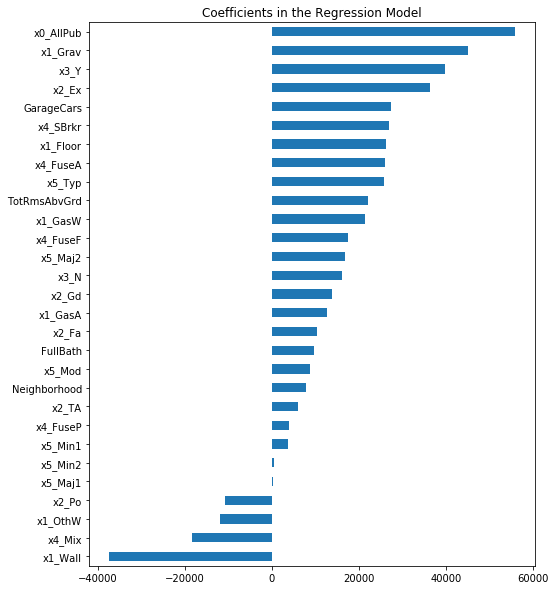

In [133]:
# Plot the coefficient used in linear regression to see which one contributes the most to saleprice
coef_toplot = pd.Series(coef_1, index = combine_col_name).sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
coef_toplot.plot(kind = "barh")
plt.title("Coefficients in the Regression Model")

The above graph plots the most dominant feature in the linear regression. The two most positively correlated columns are Utility and Central Air. It does make sense since Utility is a reletively general term that includes a lot of information and air conditioning is a central part to it. <br>
The two most negatively correlated column is Heating and Electrical. 'Wall' means there is only passsive heating and 'Mix' is a lower grade of electrical level and thus they are negatively correlated to salesprice.

In [134]:
# Caculate residual as the difference between predict value and real value
residual_toplot = pd.DataFrame({'resi':(pl_1.predict(X_test)-y_test), 'saleprice':y_test})

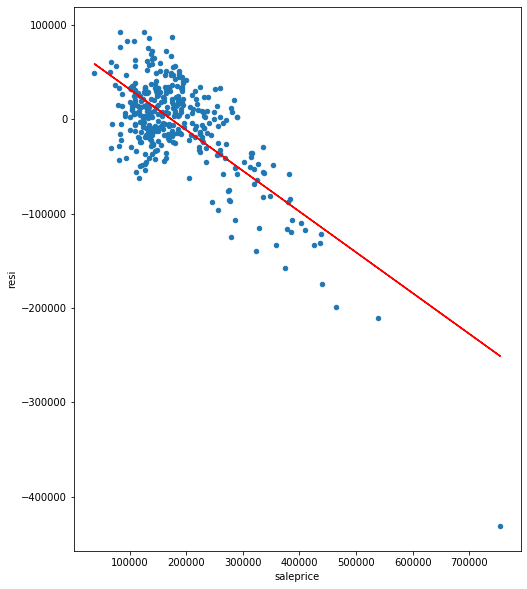

In [135]:
# This shows that our model underpredicts the sale price of house with greater value 
residual_toplot.plot(x = 'saleprice', y = 'resi',kind = "scatter")
m, b = np.polyfit(residual_toplot['saleprice'], residual_toplot['resi'], 1)
plt.plot(residual_toplot['saleprice'], b + m *residual_toplot['saleprice'], '-', color = 'red')


The residual plot above shows that our functionality model tends to underpredict the sales price of houses with higher actual price. One of the reason could be that many of the expensive houses contains feature that are not in the functionality columns.

In [136]:
func_score = cross_val_score(pl_1, df.drop(columns = ['SalePrice', 'Id']), y, cv = 3)
func_score

array([0.63052886, 0.59546111, 0.5462369 ])

### Baseline Prediction Model

Us

In [137]:

X_bl = np.array(df_baseline['OverallQual']).reshape(-1, 1)
y_bl = np.array(df_baseline['SalePrice'])



In [138]:
bl_model = LinearRegression(fit_intercept = False, normalize = True)

In [139]:
overall_score = cross_val_score(bl_model,X_bl, y_bl, cv = 3)
overall_score

array([0.57256507, 0.54101122, 0.5479269 ])

### Using style columns as predictors

Similar to the prediciting steps in above functionaility table, we also perform the fitting and transforming process in the style table in order to compare their performance. First we use `ColumnTransformer` to standardize the numerical data and one hot code the categorical data. After transforming the data, we use linear regression to predict the sale price.

In [140]:
style_df = df_st[[
'LotArea',
'LotShape',
'BldgType',
'HouseStyle',
'Exterior1st',
'Exterior2nd',
'BsmtExposure',
'Fireplaces',
'GarageType',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch']]

In [141]:
style_num_col = ['LotArea', 'Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch']
style_cat_col = [
'LotShape',
'BldgType',
'HouseStyle',
'Exterior1st',
'Exterior2nd',
'BsmtExposure',
'GarageType']

In [142]:
style_oh_ct = ColumnTransformer(transformers = [
    ('one_hot', OneHotEncoder(handle_unknown='ignore'), style_cat_col)
],
               remainder = 'passthrough'
)

In [143]:
pl_2 = Pipeline(steps = [

    ('one_hot', style_oh_ct),
    ('linear', LinearRegression(fit_intercept = False, normalize = True))    
])

In [144]:
y = df_st['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(style_df, y)
X_train.head()

,LotArea,LotShape,BldgType,HouseStyle,Exterior1st,Exterior2nd,BsmtExposure,Fireplaces,GarageType,WoodDeckSF,OpenPorchSF,EnclosedPorch
797,7677,Reg,1Fam,1Story,VinylSd,VinylSd,No,0,Attchd,0,0,0
347,17600,IR1,1Fam,1Story,Wd Sdng,Wd Sdng,No,2,Attchd,0,40,0
1003,11500,IR1,Duplex,1Story,VinylSd,VinylSd,No,0,Detchd,0,0,0
407,15576,Reg,1Fam,2Story,Wd Sdng,Plywood,No,0,Attchd,0,0,160
737,10463,IR1,1Fam,2Story,VinylSd,VinylSd,No,1,Attchd,0,116,0


In [145]:
pl_2.fit(X_train, y_train)
pl_2.score(X_test, y_test)

0.47120946395237984

In [146]:
# Get the name of the columns after using columnntransformer
ohs_cl_name = OneHotEncoder(handle_unknown='ignore').fit(X_train[style_cat_col]).get_feature_names()
style_col_name = style_num_col+list(ohs_cl_name)
style_col_name


['LotArea',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'x0_IR1',
 'x0_IR2',
 'x0_IR3',
 'x0_Reg',
 'x1_1Fam',
 'x1_2fmCon',
 'x1_Duplex',
 'x1_Twnhs',
 'x1_TwnhsE',
 'x2_1.5Fin',
 'x2_1.5Unf',
 'x2_1Story',
 'x2_2.5Fin',
 'x2_2.5Unf',
 'x2_2Story',
 'x2_SFoyer',
 'x2_SLvl',
 'x3_AsbShng',
 'x3_AsphShn',
 'x3_BrkComm',
 'x3_BrkFace',
 'x3_CBlock',
 'x3_CemntBd',
 'x3_HdBoard',
 'x3_ImStucc',
 'x3_MetalSd',
 'x3_Plywood',
 'x3_Stone',
 'x3_Stucco',
 'x3_VinylSd',
 'x3_Wd Sdng',
 'x3_WdShing',
 'x4_AsbShng',
 'x4_AsphShn',
 'x4_Brk Cmn',
 'x4_BrkFace',
 'x4_CBlock',
 'x4_CmentBd',
 'x4_HdBoard',
 'x4_ImStucc',
 'x4_MetalSd',
 'x4_Other',
 'x4_Plywood',
 'x4_Stone',
 'x4_Stucco',
 'x4_VinylSd',
 'x4_Wd Sdng',
 'x4_Wd Shng',
 'x5_Av',
 'x5_Gd',
 'x5_Mn',
 'x5_NA',
 'x5_No',
 'x6_2Types',
 'x6_Attchd',
 'x6_Basment',
 'x6_BuiltIn',
 'x6_CarPort',
 'x6_Detchd',
 'x6_NA']

In [147]:
coef_2 = pl_2.steps[1][1].coef_


Text(0.5, 1.0, 'Coefficients in the Regression Model')

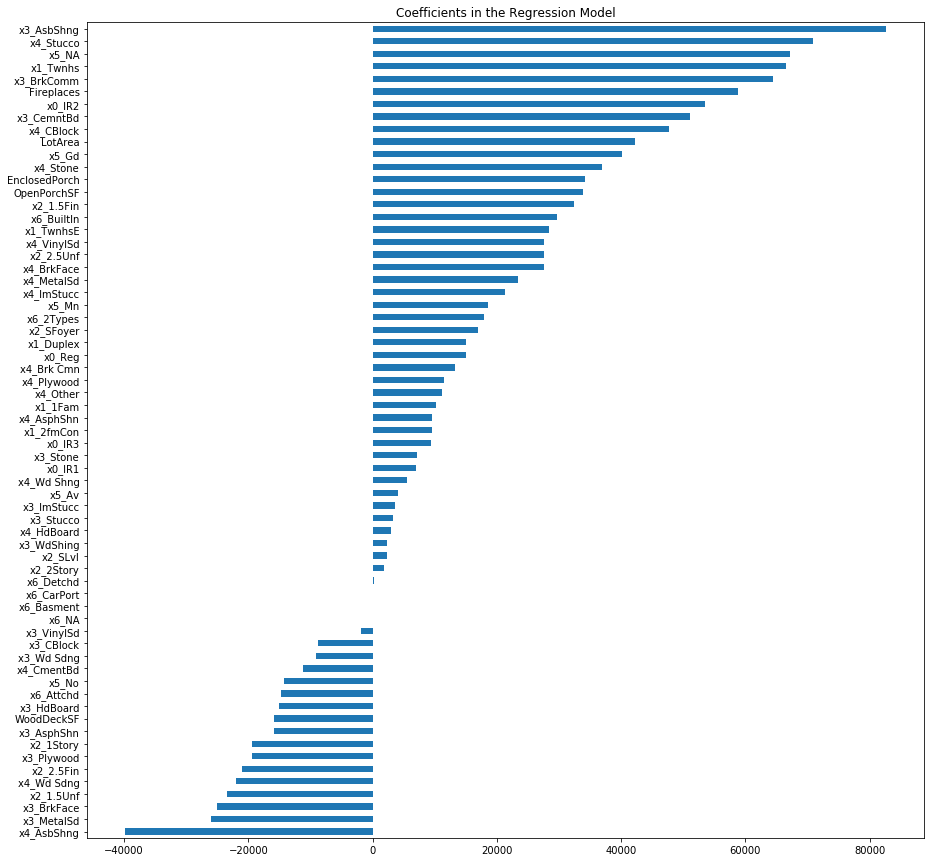

In [148]:
# Plot the coefficient used in linear regression to see which one contributes the most to saleprice
coef_toplot2 = pd.Series(coef_2, index = style_col_name).sort_values()
matplotlib.rcParams['figure.figsize'] = (15, 15.0)
coef_toplot2.plot(kind = "barh")
plt.title("Coefficients in the Regression Model")

The above graph plots the most dominant feature in the linear regression. The two most positively correlated columns are building type and exterior second. Building type contains information such as the area of the house and the fanciness of the house. 'Townhouse' is probably the most prominent expensive house type. The correlation behind building type second needs to be studied further. <br>
The two most negatively correlated column is House style and basement exposure. '2Story' seems to be common in low pricing house and the exposure in basement seems to be a trait also found in lower price houses.

In [149]:
# Caculate residual as the difference between predict value and real value
residual_toplot = pd.DataFrame({'resi':(pl_2.predict(X_test)-y_test), 'saleprice':y_test})

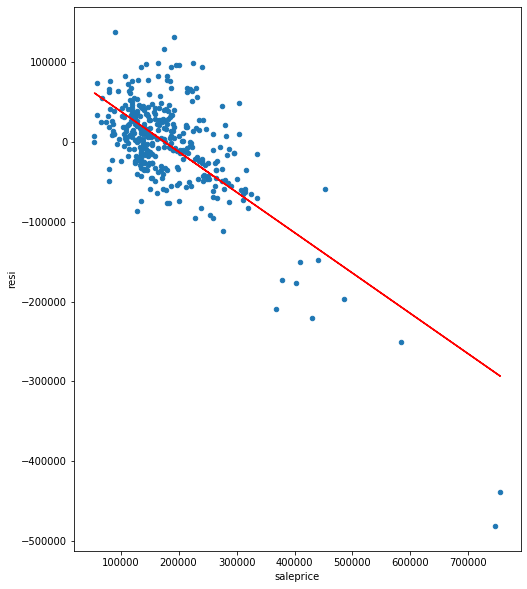

In [150]:
# This shows that our model underpredicts the sale price of house with greater value 
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
residual_toplot.plot(x = 'saleprice', y = 'resi',kind = "scatter")
m, b = np.polyfit(residual_toplot['saleprice'], residual_toplot['resi'], 1)
plt.plot(residual_toplot['saleprice'], b + m *residual_toplot['saleprice'], '-', color = 'red')

The residual plot above shows that our style model tends to underpredict the sales price of houses with higher actual price. One of the reason could be that many of the expensive houses contains feature that are not in the style columns.

In [151]:
style_score = cross_val_score(pl_2, style_df, y, cv = 3)
style_score

array([0.51794463, 0.51698258, 0.50123293])

## Model Evaluation

In [152]:
print('The score using overall column is '+str((overall_score).mean()))
print('The score using functionality columns is '+str((func_score).mean()))
print('The score using style columns is '+str((style_score).mean()))

The score using overall column is 0.5538343955606612
The score using functionality columns is 0.590742291486047
The score using style columns is 0.5120533801209022


# Ethics & Privacy

* *The Question*

We believe that our question is well proposed and neutral in the fields of house pricing. We have some background knowledge of how housing prices work but we have choosed to focus on the asset itself.

* *Implications* 

The Stakeholders are going to be the people that live in Ames, Iowa. This will help them determine what the factors of a house is important while deciding to buy a house. We don't think that this would create any nefarious side effects, since we are only determining how the overall quality, the functionality, and the style of a house affects house prices. It might slightly influence house owners that want to sell their house, but other than the id and neighborhood, there is not much strong identifiers of the properties.

* *Data Collection* 

We ultimately did not collect any data, since we found some available publicly on kaggle. Considering these are house-prices of that are available for the public to see, they implicitly provide consent to make the such data available to anyone. We believe variables like price and date built were mandatory to be displayed in order for a house to be sold.

* *Analysis*

After our analysis, we found out that the overall quality and style features were not comprehensive enough to outweigh the the importance of the functionality. Hence, we have determined that functionality is the overall driving factor in determining sale prices. We made sure to acknowledge the bias of this dataset toward only looking at the details of the houses and the price of each house. We will be careful in generalizing our results to the typical house.

* *Privacy*

We are aware that projects need to take into account ethics and privacy, and we need to be careful while handling these issues. In order to assure that we do not infringe such expectations we are going to anonymize our data. By doing so, our results will not harm the owners of the houses we analyze in our database. We will be using the Safe Harbor Method to properly anonymize our data thoroughly and only keep neighborhood as a general location identifier.

* *Evaluation*

Our research is not looking for a result in particular. Thus, we are complying with the Goodhart's Law. We hope to find what factors of the house affects thier prices in the area of study. We will do so by comparing these houses to all the houses in several proximities.

* *Transparency & Appeal*

We believe that all three features (quality, functionality, and style) correlate with house price, but we are not sure about the reasons of the correlation. Each feature incorporates various elements that we deemed to be belonging to the same category, but they might have some variations from each other. However, our main goal is to find the feature that strongly dominates all other attributes on the change in house pricing. We are defining "most dominant" by the degree of correlation that each feature has with house pricing. Our hypothesis is that Quality is going to be the "most dominant" feature. Thus, if any of the other two features' correlation is stronger than Quality's, we will be able to refute the null hypothesis. On the other hand, if both correlations are smaller, we fail to reject the null hypothesis, and Quality is the "most dominant" feature in driving house pricing changes.

# Conclusion & Discussion

At first, we state our research question on analyzing which factors/features critically affect the market house price. After researching on many relevant articles and datasets, we narrow down the question to only compare three specific factors: overall quality, functionality, and style of the property since they are the major contributors in determining how likely one would purchase a house property. Based on this background knowledge, wo provide our proposed hypothesis as following: among the three potential factors, overall quality, functionality, and style of the property, we suppose the overall quality would be the most dominant one in predicting the house prices. 

After setting the hypothesis, we find our dataset on the kaggle website which provides 79 potential factors in determining the house price. Since the overall quality feature is already defined by the dataset, we then distinguish the variables into two groups: functionality and quality before filtering out the irrelevant features. There are 12 and 10 features included in the style and functionality table respectively. After dropping/imputing the nulls, the data is clean and ready for analytical use. In data analysis, we first check the distribution of data in each feature. By inspecting the histograms of the numerical features, we see that there are many outliers in the data thus most of the distribution have right-skewed shape. We also take look on the categorical features by using the box plot, count plot and pair plot, we observe that there is a dominant category value within each variable and most of them have multimodal distribution. However, we cannot just simply remove the outliers since dropping numbers of data can potentially truncate the dataset and lose important information. Therefore we provide several self-defined functions to group values into different levels for features in order to balance the distribution of data. At this point, the features in both group (functionality and style) are distributed more equally and ready for moving to the model building stage.

In the model building stage, we need to analyze 3 different group(s) of features: the overall quality, the functionality, and the style. For model selection, we deploy the linear regression because it measures the correlation and relationship between the independent variables(features) and the dependent variable(label) to predict the sale prices. First, since the dataset already provides the overall quality as one of the attributes, we use it directly as our baseline prediction model. We then use the `LinearRegression` model to fit the overall quality variable and predict the sale price. Second, for both functionality and style groups, we use `ColumnTransformer` to transform the data, such as standardize the numerical features and one-hot-encoding the categorical features. Then we perform the grid search for hyperparameter tuning. After selecting the best parameters, we fit the model on the train datasets and score the prediction on the test datasets. Last, by inspecting the mean scores of prediction in 3 groups, it is clear that the functionality of property is the most dominant factor in determining the house price. In conclusion, we detailedly answer our research question in our project and reject the proposed hypothesis by showing the advantage of one factor among these 3 groups of potential features in analysis. However, there could be several improvements in our project. The limited time frame and unexpected outbreak of coronavirus restricted our availability on meeting up. Given more time, we could employ more tests in feature engineering and model selection, such as using polynomial regression or decision tree regressor for prediction in order to compare the performance of three groups of features. In addition, we should acquire more data and observations in order to produce a more sufficient data analysis. However, our project has successfully evaluated our obtained dataset and concluded the most dominant factor in predicting house prices. These findings would be helpful in economic market when analyze the real estate investment. It would be also beneficial for housing corporations and estate agencies when evaluate the value of properties.

# Team Contributions

In [153]:
contributions = pd.DataFrame(
    [
        ['✓', '✓', '✓', '✓', '✓'],
        ['', '', '', '', '✓'],
        [' ', '✓', ' ', '✓', ' '],
        [' ', '✓', '✓', ' ', ' '],
        [' ', '✓', ' ', ' ', ' '],
        [' ', ' ', ' ', '✓', ' '],
        ['✓', '✓', '✓', '✓', '✓'],
        ['✓', ' ', ' ', '✓', ' '],
        ['✓', '✓', '✓', ' ', ' '],
        ['✓', '✓', '✓', '✓', ' '],
        ['✓', '✓', '✓', '✓', '✓'],
        [' ', '✓', '✓', ' ', ' '],
        [' ', ' ', ' ', ' ', '✓'],
        ['✓', '✓', '✓', '✓', '✓'],
        ['✓', '✓', '✓', '✓', '✓']
    ],
    columns = ['Jiawei', 'Chris', 'Weijie', 'Yunlin', 'Yuhang'],
    index = ['Brainstorm', 'Overview', 'Research Question', 'Background & Prior Work', 'Hypothesis',
             'Datasets', 'Project Proposal', 'Data Cleaning', 'Data Analysis & Results', 
             'Data Visualization', 'Project Checkpoint','Ethics & Privacy', 'Conclusion & Discussion', 
             'Video', 'Draft Final Notebook']
    
)
contributions

,Jiawei,Chris,Weijie,Yunlin,Yuhang
Brainstorm,✓,✓,✓,✓,✓
Overview,,,,,✓
Research Question,,✓,,✓,
Background & Prior Work,,✓,✓,,
Hypothesis,,✓,,,
Datasets,,,,✓,
Project Proposal,✓,✓,✓,✓,✓
Data Cleaning,✓,,,✓,
Data Analysis & Results,✓,✓,✓,,
Data Visualization,✓,✓,✓,✓,


# Thank you professor Ellis and the TAs for such a great quarter!